<a href="https://colab.research.google.com/github/Int314/techgym-python/blob/master/techgym_python_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ダイヤ9
ハート4


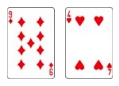

In [ ]:
import requests
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import random

card_images = []
cards = []
players = []
marks = ['ハート', 'スペード', 'ダイヤ', 'クローバー']
display_names = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
numbers = [11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

# カード画像読み込み
def load_image():
  image_name = 'cards.jpg'
  vsplit_number = 4
  hsplit_number = 13
  
  if not os.path.isfile(image_name):
    response = requests.get('http://3156.bz/techgym/cards.jpg', allow_redirects=False)
    with open(image_name, 'wb') as image:
      image.write(response.content)
   
  img = cv.imread('./'+image_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
  h, w = img.shape[:2]
  crop_img = img[:h // vsplit_number * vsplit_number, :w // hsplit_number * hsplit_number]
  
  card_images.clear()
  for h_image in np.vsplit(crop_img, vsplit_number):
    for v_image in np.hsplit(h_image, hsplit_number):
      card_images.append(v_image)

class Card:
  def __init__(self, mark, display_name, number, image):
    self.mark = mark
    self.display_name = display_name
    self.number = number
    self.image = image
    self.is_dealt = False

class Player:
  def __init__(self, name):
    self.name = name
    self.cards = []
    self.total_number = 0

class Human(Player):
  def __init__(self):
    super().__init__('自分')

class Computer(Player):
  def __init__(self):
    super().__init__('コンピューター')

def create_cards():
  cards.clear()
  for i, mark in enumerate(marks):
    for j, number in enumerate(numbers):
      cards.append( Card(mark, display_names[j], number, card_images[i*len(numbers)+j]) )

def show_cards(cards):
  for i, card in enumerate(cards):
    print(f"{card.mark}{card.display_name}")
    plt.subplot(1, 6, i + 1)
    plt.axis('off')
    plt.imshow(card.image)
  plt.show()

def deal_card(player):
  tmp_cards = list(filter(lambda n: n.is_dealt == False, cards))
  assert (len(tmp_cards) != 0), "残りカードなし"

  tmp_card = random.choice( tmp_cards )
  tmp_card.is_dealt = True

  player.cards.append( tmp_card )
  player.total_number += tmp_card.number
  calc_ace(player)

# 「A」の計算
def calc_ace(player):
  for card in player.cards:
    if player.total_number >= 22:
      if card.number == 11:
        player.total_number -= 10
        card.number = 1

def win():
  show_result('win')

def lose():
  show_result('lose')

def choice():
  message = 'ヒット[1] or スタンド[2]'
  choice_key = input(message)
  while not enable_choice(choice_key):
    choice_key = input(message)
  return int(choice_key)

def enable_choice(string):
  if string.isdigit():
    number = int(string)
    if number >= 1 and number <= 2:
      return True
    else:
      return False
  else:
    return False

def play_once():
  deal_card( players[0] )
  deal_card( players[0] )
  deal_card( players[1] )
  show_cards( players[0].cards )

  if is_blackjack():
    win()
  else:
    choice_key = choice()
    if choice_key == 1:
      hit()
    elif choice_key == 2:
      stand()

def is_blackjack(): 
  if(players[0].total_number == 21):
    return True
  else:
    return False

def is_burst(player): 
  if(player.total_number >= 22):
    return True
  else:
    return False

def hit():
  deal_card( players[0] )
  show_cards( players[0].cards )
  if is_blackjack():
    win()
  elif is_burst(players[0]):
    lose()
  else:
    choice_key = choice()
    if choice_key == 1:
      hit()
    elif choice_key == 2:
      stand()

def stand():
  deal_card( players[1] )
  if is_burst(players[1]):
    win()
  else:
    if players[1].total_number < 17:
      stand()
    else:
      result = judge()
      show_result(result)

def judge():
  diff = players[0].total_number - players[1].total_number
  if diff == 0:
    result = 'draw'
  elif diff >= 1:
    result = 'win'
  else:
    result = 'lose'
  return result

def show_result(result):
  for player in players:
    print(f"{player.name}のカードは")
    show_cards( player.cards )

  if result == 'draw':
    print('引き分け')
  elif result == 'win':
    print(f"{players[0].name}の勝ち")
  else:
    print(f"{players[1].name}の勝ち")

def play():
  load_image()
  create_cards()
  players.append( Human() )
  players.append( Computer() )

  play_once()

play()